In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv


# Getting the data

In [2]:
df=pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.shape

(4446966, 29)

In [6]:
df.isna().sum()  #we will not convert values of -1 to none ,just leave them

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
df[df['winPlacePerc'].isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
df=df.drop(2744604)            #dropping this nan
df=df.reset_index(drop=True)

In [9]:
df.matchId.value_counts()        #it seems the data have all players os some matches 
                                 #but actually I didn't use it

ca008ce9a1339c    100
5a25ae1d0a6719    100
0949965644caa5    100
a33b55305a88fd    100
51b68a308313f9    100
                 ... 
1f251de6c42568      7
9f2b49358564ea      6
39d2800dad8ae6      6
8aa5066c4b6a79      5
e5a77433bc436f      2
Name: matchId, Length: 47964, dtype: int64

In [10]:
df[df.killPoints==0][df.rankPoints!=-1].shape    #getting the shape of 0 kill points and no rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(2655646, 29)

In [11]:
df[df.killPoints==0].shape                   #it seems all 0 kill points has no rank

(2655646, 29)

In [12]:
df.describe()          #getting the statistical analysis of the data 

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,2.299760e+01,1.579507e+03,4.450468e+01,4.300760e+01,8.920103e+02,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587388e+02,2.382810e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [13]:
df.matchType.value_counts() 

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

# Visualizing the data and getting insights

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [15]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


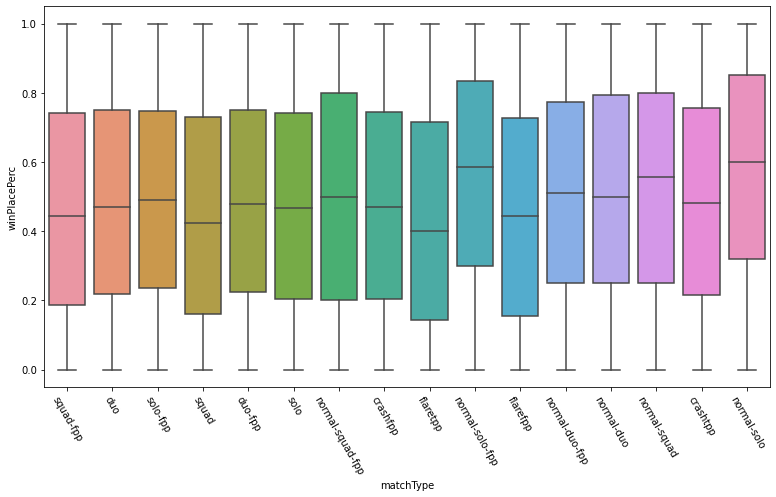

In [16]:
plt.figure(figsize=(13,7))
sns.boxplot(x='matchType',y='winPlacePerc',data=df)     
plt.xticks(rotation=300)
plt.show()


#it seems the type of match isn't playing a big role in winning

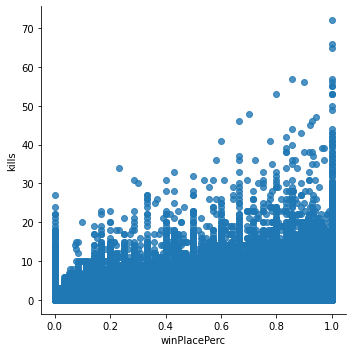

In [17]:
sns.lmplot(x='winPlacePerc',y='kills',data=df,fit_reg=False)
plt.show()

#A lot wins without even one kill, may be they are cheaters or have a great team beside them
#but in general more kills more wins

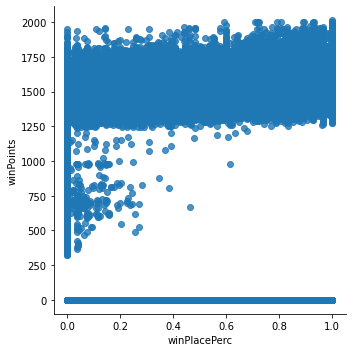

In [18]:
sns.lmplot(x='winPlacePerc',y='winPoints',data=df,fit_reg=False)
plt.show()

#win points don't give you more probabilty to win ever

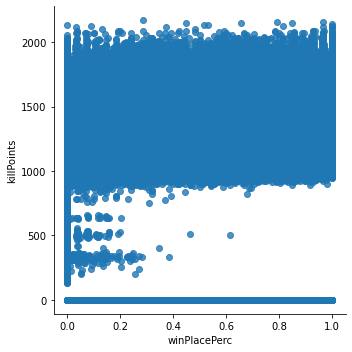

In [19]:
sns.lmplot(x='winPlacePerc',y='killPoints',data=df,fit_reg=False)
plt.show()

#neither kill points

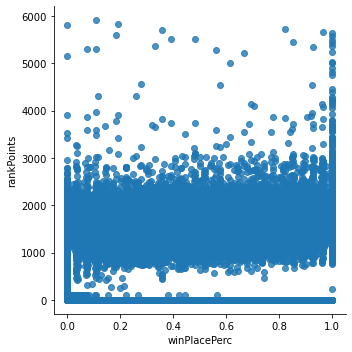

In [20]:
sns.lmplot(x='winPlacePerc',y='rankPoints',data=df,fit_reg=False)
plt.show()

#and rank is trash 

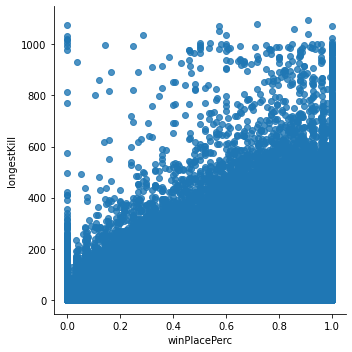

In [21]:
sns.lmplot(x='winPlacePerc',y='longestKill',data=df,fit_reg=False)
plt.show()

#okay it has a little tiny correlation but a lot of noise 

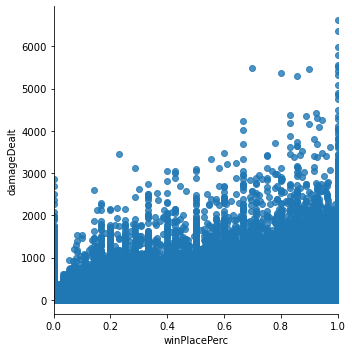

In [22]:
sns.lmplot(x='winPlacePerc',y='damageDealt',data=df)
plt.show()

#some winners didn't even make a scratch ,but you can see a slight correlation though

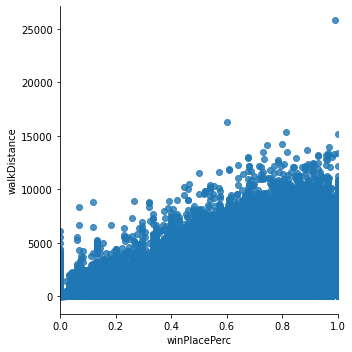

In [23]:
sns.lmplot(x='winPlacePerc',y='walkDistance',data=df)
plt.show()

#winners without even walk ,hackers

In [24]:
df[df['walkDistance']==0][df['winPlacePerc']==1].describe()

#and a lot of cheaters here weapons and kills without a single move

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.0,965.0,965.000000,965.000000,965.0,965.0,965.000000,965.000000,965.0
mean,0.404145,0.328497,239.227626,0.269430,0.368912,0.644560,6.896373,70.519171,1.414508,0.336788,16.361784,1637.976166,15.789637,3.627979,1397.215544,0.030052,0.0,0.0,0.008045,0.033161,0.0,0.0,8.398964,102.677720,1.0
std,1.334347,1.270829,436.468670,1.801322,1.630450,1.956764,12.370476,261.330007,4.434657,0.885302,68.833642,376.131638,4.906416,4.343336,379.074913,0.261912,0.0,0.0,0.176189,0.282510,0.0,0.0,7.882790,379.163882,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,352.000000,2.000000,2.000000,-1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1808.000000,15.000000,2.000000,1500.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.000000,0.000000,1.0
50%,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1808.000000,17.000000,2.000000,1500.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,6.000000,0.000000,1.0
75%,0.000000,0.000000,252.400000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1808.000000,18.000000,2.000000,1500.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,11.000000,0.000000,1.0
max,11.000000,14.000000,5090.000000,33.000000,26.000000,22.000000,72.000000,1365.000000,43.000000,9.000000,1072.000000,1925.000000,54.000000,30.000000,1589.000000,5.000000,0.0,0.0,4.360000,4.000000,0.0,0.0,68.000000,1564.000000,1.0


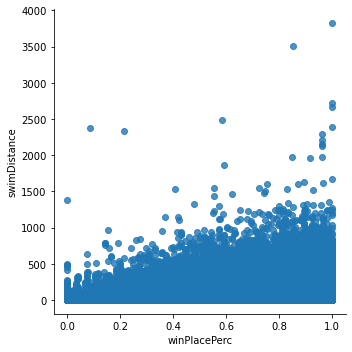

In [25]:
sns.lmplot(x='winPlacePerc',y='swimDistance',data=df,fit_reg=False)
plt.show()

#not interesting 

## Converting some numerical features into categories

In [26]:
weapons_num=pd.cut(df['weaponsAcquired'],[0,2,6,12,25,50,100,200,300],
                   labels=['0-2','2-6','6-12','12-25','25-50','50-100','100-200','+200'])

#making the number of weapons acquired in categories so we can visualize it properly

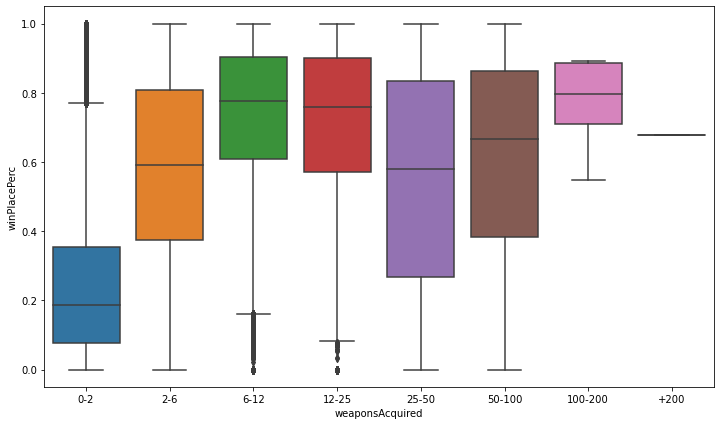

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x=weapons_num,y='winPlacePerc',data=df)
plt.show()

#okay having weapons from 6 and up to 25 makes your probability to win a bit more
#it's the proper number beacuse more than 100 hunderd are likely cheatings

In [28]:
del weapons_num

In [29]:
kills=pd.cut(df['kills'],[1,10,20,40,60,80],labels=['1-10','10-20','20-40','40-60','+60'])
#make kills in categories

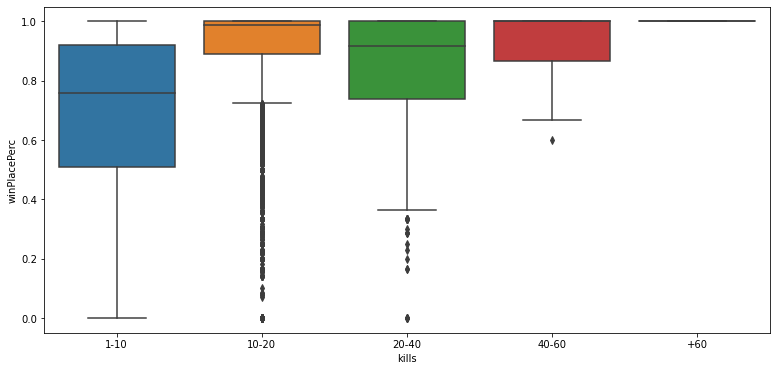

In [30]:
plt.figure(figsize=(13,6))
sns.boxplot(x=kills,y=df['winPlacePerc'])
plt.show()

In [31]:
df.headshotKills.value_counts()

#64 headshot !

0     3696115
1      574741
2      126348
3       32975
4        9962
5        3616
6        1439
7         757
8         373
9         215
10        136
11         79
12         64
13         44
14         23
15         16
16         15
17         11
18          9
19          3
20          3
23          3
26          3
27          2
21          2
31          2
34          2
40          1
42          1
41          1
46          1
39          1
35          1
64          1
Name: headshotKills, dtype: int64

In [32]:
head_shot=pd.cut(df['headshotKills'],[0,1,2,3,4,7,10,16,19,35,64],
                 labels=['0','1','2','3','4-7','7-10','10-16','16-19','19-35','35-64'])

#making head shots in categories

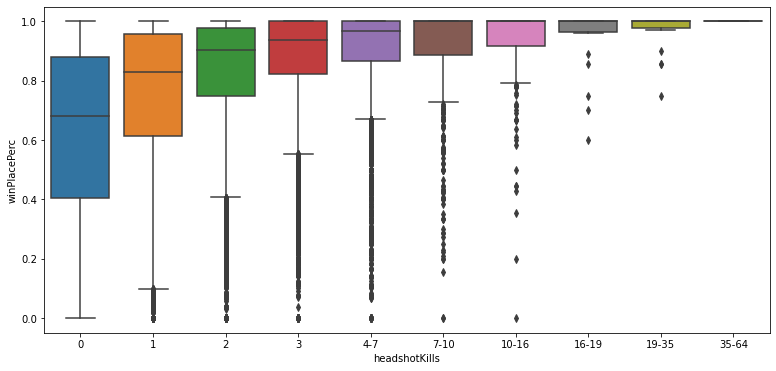

In [33]:
plt.figure(figsize=(13,6))
sns.boxplot(x=head_shot,y=df['winPlacePerc'])

#if you get more than 5 head shots you are likely more to win 

# Adding new features

In [34]:
groups=df.groupby('groupId').sum()

#we will make some features that take all the group in consideration

In [35]:
groups=groups.reset_index()

In [36]:
groups.head()

,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,00000c08b5be36,0,1,741.50,5,1,1,151,0,2,2,27.155,4287,78,78,4372,0,0.0,0,0.00,0,0,814.60,7,0,0.6000
1,00000d1cbbc340,0,0,173.70,0,0,0,40,0,1,1,1.964,1196,27,24,1551,0,0.0,0,0.00,0,0,135.80,3,0,0.1154
2,000025a09dd1d7,0,0,0.00,0,0,0,72,0,0,0,0.000,2021,91,89,1584,0,0.0,0,0.00,0,0,110.80,2,0,0.2000
3,000038ec4dff53,2,7,790.67,5,1,9,39,0,6,3,160.530,4410,81,81,4548,2,0.0,0,224.77,0,0,6248.00,17,0,2.8845
4,00003a54230763,1,0,100.00,1,1,0,109,2026,1,1,3.171,4380,88,84,-2,0,0.0,0,0.00,0,0,185.35,5,3002,0.2790


In [37]:
add_col=groups.loc[:,['groupId','kills','revives','weaponsAcquired','teamKills']]

#These are the new columns

In [38]:
add_col=add_col.rename(columns={'kills':'groupKills','revives':'groupRevives',
                                'weaponsAcquired':'groupWeapons','teamKills':'groupOwnKills'})

#let's give them nice names 

In [39]:
df2=df.merge(add_col,how='left',on=['groupId'])
#and we merge them with the data

In [40]:
df2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,groupKills,groupRevives,groupWeapons,groupOwnKills
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,4,0,5,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,4,0,24,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,2,0,4,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,0,0,3,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,1,0,2,0


In [41]:
del df 
del groups
del add_col
#then get rid of them 

In [42]:
df2.loc[:,['groupKills','groupRevives','groupWeapons','groupOwnKills']].describe()

,groupKills,groupRevives,groupWeapons,groupOwnKills
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.623491e+00,5.476522e-01,1.094753e+01,8.239237e-02
std,3.771704e+00,1.038985e+00,9.460719e+00,3.868298e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00
75%,4.000000e+00,1.000000e+00,1.500000e+01,0.000000e+00
max,1.990000e+02,4.200000e+01,6.030000e+02,5.600000e+01


## Let's visualize these new features 

In [43]:
gkills=pd.cut(df2['groupKills'],[1,10,20,40,60,80,200],
              labels=['1-10','10-20','20-40','40-60','60-80','+80'])

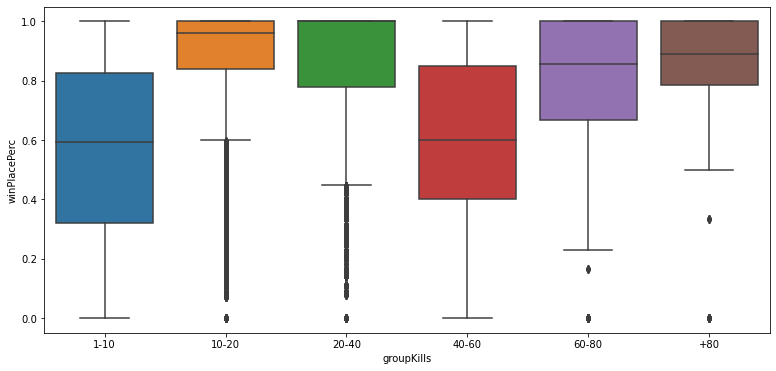

In [44]:
plt.figure(figsize=(13,6))
sns.boxplot(x=gkills,y=df2['winPlacePerc'])
plt.show()

In [45]:
gweapons_num=pd.cut(df2['groupWeapons'],[0,2,6,12,25,50,100,200,300,700],
                labels=['0-2','2-6','6-12','12-25','25-50','50-100','100-200','200-300','+300'])

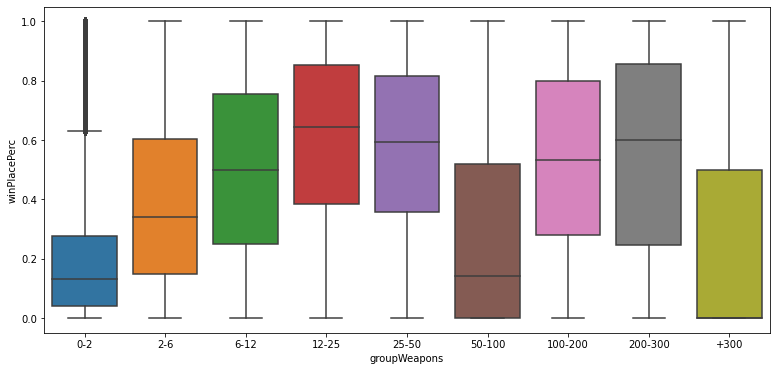

In [46]:
plt.figure(figsize=(13,6))
sns.boxplot(x=gweapons_num,y=df2['winPlacePerc'])
plt.show()

#Your group should have from 12 to 25 to be close to win 
#because the game is not about collecting weapons

In [47]:
grevives=pd.cut(df2['groupRevives'],[0,2,4,8,15,30,50],
                labels=['0-2','2-4','4-8','8-15','15-30','+30'])

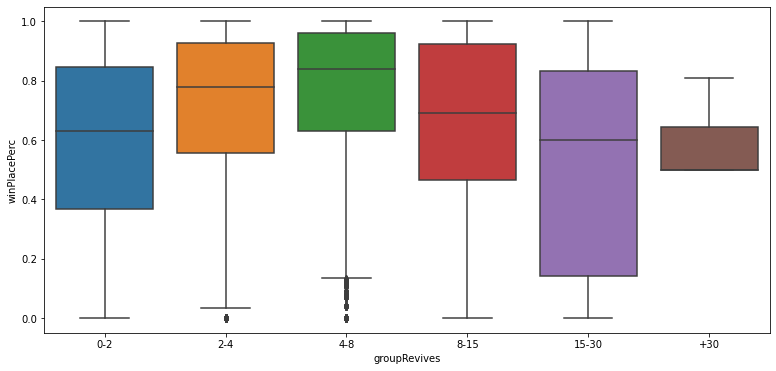

In [48]:
plt.figure(figsize=(13,6))
sns.boxplot(x=grevives,y=df2['winPlacePerc'])
plt.show()

> # So to make your win more certain, you should have minimum 6 weapons ,10 kills,5 headshots,your group make about 4 revives and run a lot if you are not a hacker anyway

# Preparing the data for the model

In [49]:
df2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,groupKills,groupRevives,groupWeapons,groupOwnKills
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,4,0,5,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,4,0,24,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,2,0,4,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,0,0,3,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,1,0,2,0


In [50]:
df2['matchType']=df2.matchType.astype('category') #make it categorical to encode

In [51]:
df2['matchtype']=df2['matchType'].cat.codes  #encoding

In [52]:
df2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,groupKills,groupRevives,groupWeapons,groupOwnKills,matchtype
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,4,0,5,0,15
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,4,0,24,0,15
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,2,0,4,0,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,0,0,3,0,15
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,1,0,2,0,13


In [53]:
pubg=df2.drop(columns=['Id','groupId','matchId','matchType'])  

In [54]:
del df2

In [55]:
pubg=pubg.drop(columns=['killPoints','matchDuration','maxPlace','numGroups','rankPoints'
                        ,'winPoints','groupOwnKills','teamKills','vehicleDestroys'])

#dropping the unnecessary columns

## Splitting the data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x=pubg.drop(columns=['winPlacePerc'])
y=pubg['winPlacePerc']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [59]:
del x
del y

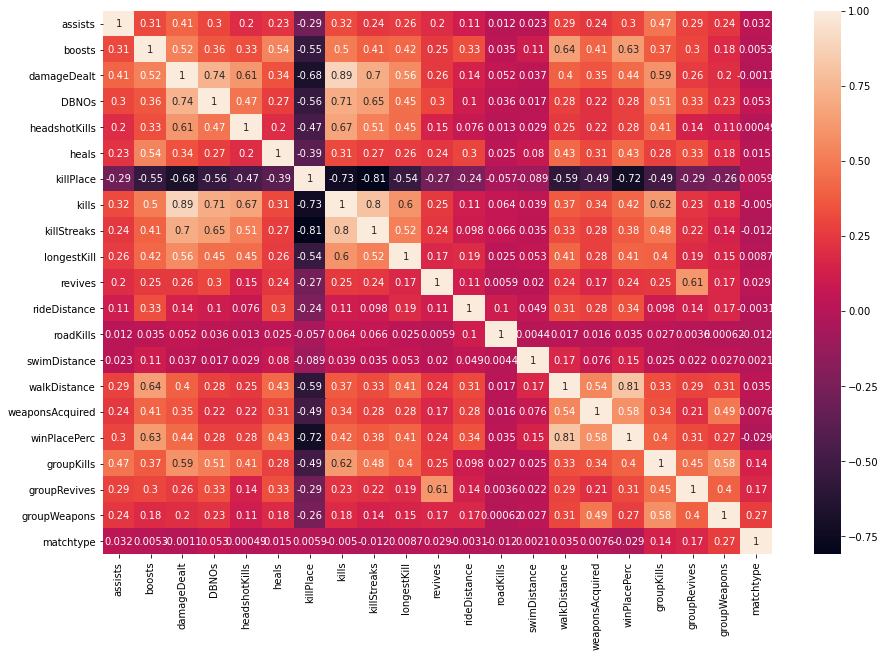

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(pubg.corr(),annot=True)

In [61]:
corr_matrix = pubg.corr()
corr_matrix["winPlacePerc"].sort_values(ascending=False)

#It seems that some of our new features are good correlated 

winPlacePerc       1.000000
walkDistance       0.810888
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
groupKills         0.399050
killStreaks        0.377566
rideDistance       0.342915
groupRevives       0.313463
assists            0.299441
DBNOs              0.279970
headshotKills      0.277722
groupWeapons       0.271020
revives            0.240881
swimDistance       0.149607
roadKills          0.034544
matchtype         -0.028514
killPlace         -0.719069
Name: winPlacePerc, dtype: float64

# Linear Regression model

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.1300680711679003

In [64]:
del lin_reg
del lin_mse
del lin_rmse

# Decision Tree model

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [66]:
y_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#great

0.12788095788017537

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)

In [68]:
-scores

array([0.01634767, 0.01636925, 0.01645195, 0.01646288, 0.01640754])

In [69]:
del scores

# Model tunning

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [6, 8,None]},
  ]

grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8, None]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_params_
#I knew it

{'max_features': None}

In [72]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(pubg.drop(columns=['winPlacePerc']), pubg['winPlacePerc'])

#Fitting the model with all the data and it's ready to go

DecisionTreeRegressor(random_state=42)

## Handling the test set

In [73]:
df_test=pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/test_V2.csv')

In [74]:
groups=df_test.groupby('groupId').sum()
groups=groups.reset_index()

In [75]:
add_col=groups.loc[:,['groupId','kills','revives','weaponsAcquired','teamKills']]
add_col=add_col.rename(columns={'kills':'groupKills','revives':'groupRevives','weaponsAcquired':'groupWeapons','teamKills':'groupOwnKills'})
df2_test=df_test.merge(add_col,how='left',on=['groupId'])

In [76]:
df2_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,groupKills,groupRevives,groupWeapons,groupOwnKills
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0,0,0,10,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0,7,2,13,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0,12,0,15,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0,0,0,8,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0,7,1,18,0


In [77]:
df2_test['matchType']=df2_test.matchType.astype('category')
df2_test['matchtype']=df2_test['matchType'].cat.codes

In [78]:
final=df2_test.drop(columns=['Id','groupId','matchId','matchType'])
final=final.drop(columns=['killPoints','matchDuration','maxPlace','numGroups',
                          'rankPoints','winPoints','groupOwnKills','teamKills','vehicleDestroys'])

In [79]:
Id=df2_test['Id']  #for submission

In [80]:
winPlacePerc = tree_reg.predict(final)  #our prediction

In [81]:
pred =pd.concat([Id,pd.Series(winPlacePerc)],axis=1)

In [82]:
pred=pred.rename(columns={0:'winPlacePerc'})

In [83]:
pred.to_csv('submission.csv',index=False) 